### Gradient Descent:

Gradient descent is a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for finding a local minimum of a differentiable multivariate function.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
# load the data
data = pd.read_csv("studenthrs.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,24
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
# separating columns from the data
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [16]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8, 2.5,
       3.3, 4.2, 2.5, 1.6, 2.7, 3.6, 5.7, 1.3, 6.2, 5.1, 4.1, 3.4, 6.2,
       5.7, 5.1, 4.2, 4.1, 3.6, 3.4, 3.3, 2.7, 2.5, 1.6, 1.3, 8.9, 7.8,
       7.7, 7.4, 6.9, 6.1, 5.9, 4.8, 4.5, 4.2, 3.8, 3.3, 3.3, 2.7, 2.5,
       2.5, 2.5, 1.9, 1.1, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8,
       3.8, 6.9, 7.8, 2.5, 3.3, 4.2])

In [17]:
y

array([24, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86, 30, 43, 39, 24, 20, 26, 45, 58, 18,
       70, 48, 38, 43, 70, 58, 48, 39, 38, 45, 43, 43, 26, 24, 20, 18, 95,
       86, 85, 69, 76, 67, 62, 54, 41, 39, 35, 42, 43, 30, 30, 30, 24, 24,
       17, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86, 30, 43, 39],
      dtype=int64)

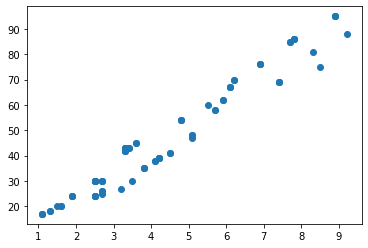

In [7]:
plt.scatter(X,y)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [19]:
lr.fit(X.reshape(-1,1),y.reshape(-1,1))
print(lr.coef_) # this is the 'm' value which is slope
print(lr.intercept_) # this is the 'b' value which is y-intercept

[[9.80463865]]
[3.81336633]


In [11]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.8850428940223228

- cross_val_score is a function that generates a cross-validated accuracy score for each data point of our dataset.

In [33]:
class GDRegressorMera:
    
    def __init__(self,learning_rate,epochs):
        self.m = 45
        self.b = -65
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,X,y):
        # calculate 'b' and 'm'
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X - self.b)*X)
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
    
        print(self.m,self.b)

In [54]:
gd = GDRegressorMera(0.000001,1100000)

In [55]:
gd.fit(X,y)

9.8046386498126 3.8133663314198123


After setting appropriate 'learning rate' and 'epochs' finally values matched with the desired values of **'m'** and **'b'** using Gradient Descent Method on Linear Regression.